In [1]:
%run ./basic-neural-network.ipynb
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from keras.datasets import imdb

In [3]:
# set to None to use the entire dataset
N_SAMPLES = 50000
# set to None for irreproducible results
RANDOM_SEED = 0

In [4]:
# the X values are lists consisting of pairs of unique word IDs and their number of occurences for each respective document
# this is known as a sparse bag-of-words representation
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = [np.array(list(Counter(sample).items())) for sample in np.concatenate((X_train, X_test), axis=0)]
y = np.array([np.eye(2)[label] for label in np.concatenate((y_train, y_test), axis=0)])

# shuffle the dataset, then truncate it
X, y = shuffle(X, y, random_state=RANDOM_SEED)
X, y = X[:N_SAMPLES], y[:N_SAMPLES]

# obtain dictionary size (will equal the length of the input layer)
dict_size = max([pair[0] for sparse in X for pair in sparse]) + 1

train_samples, test_samples, train_labels, test_labels = train_test_split(X, y, random_state=RANDOM_SEED)

In [5]:
hidden_layer_size = 2
iterations = 100 + 1
learning_rate = 1e-3
batch_size = 512  # set to 1 for stochastic gradient descent
hid_activation = Activation.RELU
out_activation = Activation.SIGMOID
dropout = 0.5
input_as_boolean = True
skip_remaining = True
random_seed = RANDOM_SEED

model = BasicSparseNeuralNetwork(dict_size, hidden_layer_size, epochs=iterations, learning_rate=learning_rate,
                                 batch_size=batch_size, skip_remaining=skip_remaining,
                                 hid_activation=hid_activation, out_activation=out_activation, 
                                 dropout=dropout, input_as_boolean=input_as_boolean, 
                                 is_generator=True, random_seed=random_seed)

results = []
for _ in tqdm(model.fit(train_samples, train_labels), total=iterations):
    train_loss, train_accuracy = model.evaluate(train_samples, train_labels)
    test_loss, test_accuracy = model.evaluate(test_samples, test_labels)
    results.append({'Train Loss (MSE)': train_loss, 'Train Accuracy': train_accuracy,
                    'Test Loss (MSE)': test_loss, 'Test Accuracy': test_accuracy})

df = pd.DataFrame(results)
df.index += 1
df[['Train Loss (MSE)', 'Train Accuracy', 'Test Loss (MSE)', 'Test Accuracy']][::10].style \
        .highlight_min(subset=['Train Accuracy', 'Test Accuracy'], color="lightcoral") \
        .highlight_max(subset=['Train Accuracy', 'Test Accuracy'], color="lightgreen") \
        .highlight_min(subset=['Train Loss (MSE)', 'Test Loss (MSE)'], color="lightgreen") \
        .highlight_max(subset=['Train Loss (MSE)', 'Test Loss (MSE)'], color="lightcoral")

100%|████████████████████████████████████████████████████████████████████████████████| 101/101 [03:33<00:00,  2.11s/it]


,Train Loss (MSE),Train Accuracy,Test Loss (MSE),Test Accuracy
1,0.462426,0.628587,0.463285,0.625680
11,0.148811,0.900693,0.186091,0.879360
21,0.112776,0.929333,0.175312,0.881120
31,0.179372,0.841840,0.223921,0.801200
41,0.073045,0.946907,0.167536,0.887120
51,0.071220,0.950747,0.170881,0.887680
61,0.074023,0.955387,0.175047,0.885840
71,0.053323,0.961840,0.170432,0.885040
81,0.044934,0.961707,0.172514,0.886720
91,0.041980,0.967067,0.173702,0.883120


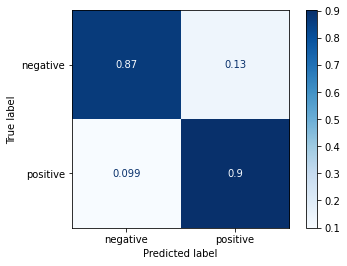

In [6]:
preds = model.predict(test_samples)
true_preds, true_labels = [np.argmax(pred) for pred in preds], \
                          [np.argmax(label) for label in test_labels]
ConfusionMatrixDisplay.from_predictions(true_preds, true_labels, normalize='true',
                                        cmap=plt.cm.Blues, display_labels=('negative', 'positive'))